# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
from datetime import datetime
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'MCForecastTools'

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc_data['data']['1']['quotes']['USD']['price']

In [6]:
# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

In [7]:
# Compute current value of my crpto
btc = btc_price * my_btc
eth = eth_price * my_eth
crypto = btc + eth

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth:0.2f}")

The current value of your 1.2 BTC is $45476.40
The current value of your 5.3 ETH is $12442.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

str

In [12]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [13]:
# Format current date as ISO format
date = pd.Timestamp("2021-05-28", tz="America/Chicago").isoformat()

In [14]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = date,
    end = date
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open    high    low   close   volume    open   
time                                                                        
2021-05-28 00:00:00-04:00  114.55  114.68  114.5  114.51  6186451  420.97   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-28 00:00:00-04:00  421.25  419.79  420.02  49200328

In [15]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date

In [16]:
agg_close_price = df_closing_prices.iat[0, 0]
spy_close_price = df_closing_prices.iat[0, 1]

In [17]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.51
Current SPY closing price: $420.02


In [18]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21001.00
The current value of your 200 AGG shares is $22902.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
data = [['crypto', crypto], ['shares', shares]]
df_savings = pd.DataFrame(data, columns = ['Type', 'Amount'])
df_savings.set_index(df_savings['Type'], inplace=True)
df_savings = df_savings.drop(columns=["Type"])
# Display savings DataFrame
display(df_savings)

,Amount
Type,
crypto,57919.263
shares,43903.000


<AxesSubplot:title={'center':'Savings Amount'}, ylabel='Amount'>

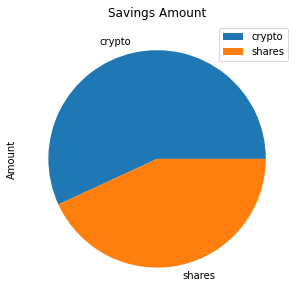

In [20]:
# Plot savings pie chart
df_pie = df_savings.plot.pie(y='Amount', figsize=(5, 5), title="Savings Amount",)
df_pie

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
savings = crypto + shares
difference = emergency_fund - savings
# Validate saving health
if savings > emergency_fund:
    print("Congratulations for having enough money in this fund!")
elif savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
elif savings < emergency_fund:
    print("You are ${difference} from reaching your goal")

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-20', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-05-20', tz='America/Chicago').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
df_prediction = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_prediction

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-12-28 00:00:00-05:00  117.97  118.0450  117.8330  118.010  3503095   
2020-12-29 00:00:00-05:00  118.06  118.0600  117.9200  118.050  3255442   
2020-12-30 00:00:00-05:00  118.09  118.1200  117.9815  118.100  2593714   
2020-12-31 00:00:00-05:00  118.18  118.2400  118.1200  118.200  4325026   
2021-01-04 00:00:00-05:00  118.08  118.1400  117.9850  118.040  6211938   
...                           ...       ...       ...      ...      ...   
2021-05-14 00:00:00-04:00  114.22  114.2800  114.1219  114.280  3711363   
2021-05-17 00:00:00-04:00  114.21  115.4999  111.2600  114.165  3852318   
2021-05-18 00:00:00-04:00  114.11  114.1100  114.0300  114.070  3499293   
2021-05-19 00:00:00-04:00  114.62  114.6200  113.7900  113.920  6576312   
2021-05-20 00:00:00-04:00  114.08  114.3000  114.0800  114.290  5646506   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2020-12-28 00:00:00-05:00  371.74  372.590  371.070  372.14  31589494  
2020-12-29 00:00:00-05:00  373.81  374.000  370.830  371.48  45214280  
2020-12-30 00:00:00-05:00  372.34  373.100  371.570  371.93  40295732  
2020-12-31 00:00:00-05:00  371.78  374.660  371.232  373.85  52720911  
2021-01-04 00:00:00-05:00  375.31  375.450  364.820  368.85  92938087  
...                           ...      ...      ...     ...       ...  
2021-05-14 00:00:00-04:00  413.20  417.490  413.180  416.53  69012933  
2021-05-17 00:00:00-04:00  415.39  416.390  413.360  415.54  57713174  
2021-05-18 00:00:00-04:00  415.80  416.060  411.770  411.99  52318555  
2021-05-19 00:00:00-04:00  406.92  411.050  405.335  410.90  94165741  
2021-05-20 00:00:00-04:00  411.80  416.625  411.670  415.24  69408898  

[100 rows x 10 columns]

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

class MCSimulation:
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data.xs('close',level=1,axis=1).pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

In [26]:
# Printing the simulation input data
MC_even_dist = MCSimulation(
    portfolio_data = df_prediction,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-12-28 00:00:00-05:00  117.97  118.045  117.8330  118.01  3503095   
2020-12-29 00:00:00-05:00  118.06  118.060  117.9200  118.05  3255442   
2020-12-30 00:00:00-05:00  118.09  118.120  117.9815  118.10  2593714   
2020-12-31 00:00:00-05:00  118.18  118.240  118.1200  118.20  4325026   
2021-01-04 00:00:00-05:00  118.08  118.140  117.9850  118.04  6211938   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2020-12-28 00:00:00-05:00          NaN  371.74  372.59  371.070  372.14   
2020-12-29 00:00:00-05:00     0.000339  373.81  374.00  370.830  371.48   
2020-12-30 00:00:00-05:00     0.000424  372.34  373.10  371.570  371.93   
2020-12-31 00:00:00-05:00     0.000847  371.78  374.66  371.232  373.85   
2021-01-04 00:00:00-05:00    -0.001354  375.31  375.45  364.820  368.85   

                                                  
                             volume daily_return  
time                                              
2020-12-28 00:00:00-05:00  31589494          NaN  
2020-12-29 00:00:00-05:00  45214280    -0.001774  
2020-12-30 00:00:00-05:00  40295732     0.001211  
2020-12-31 00:00:00-05:00  52720911     0.005162  
2021-01-04 00:00:00-05:00  92938087    -0.013374

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000508,0.999212,0.995267,0.993979,0.992682,1.001397,1.004620,0.999576,1.000616,1.000345,...,1.001756,1.007096,1.001073,1.002675,1.001401,1.002773,0.996768,1.006914,0.997992,0.997357
2,1.003881,1.002159,0.996205,0.989555,0.993293,0.999221,0.996380,1.004323,1.003603,1.006329,...,1.002952,1.003859,0.999747,1.001577,0.999279,1.000607,1.003213,1.005668,0.992060,0.998777
3,0.997722,1.001139,0.991358,0.986912,1.002109,1.004177,0.996644,1.002456,0.999178,1.007989,...,1.000305,1.010614,0.998736,1.002161,1.000785,1.005764,0.998921,1.003912,0.992660,1.001896
4,0.996551,1.005415,0.992149,0.994380,1.000014,0.996331,0.997839,0.999820,0.994501,1.007135,...,0.999207,1.014597,0.999506,0.998088,1.002494,1.002568,1.002665,1.004262,0.989558,1.006285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.257224,6.580823,6.166041,10.742380,4.766620,6.610025,9.132620,6.072002,3.028668,11.644450,...,6.478978,7.682033,10.358225,6.490200,7.588425,5.619085,5.954159,7.274548,8.570639,6.674044
7557,11.216167,6.616446,6.118538,10.820432,4.805328,6.594186,9.165494,6.078874,3.008314,11.696835,...,6.509105,7.690318,10.361121,6.526249,7.569437,5.635455,5.980354,7.270812,8.682822,6.672644
7558,11.137838,6.628740,6.109772,10.742869,4.806183,6.586658,9.190616,6.087524,2.981917,11.741328,...,6.460772,7.741103,10.381886,6.519952,7.660286,5.617938,5.985074,7.328118,8.670368,6.702322
7559,11.107488,6.610864,6.100598,10.773151,4.811696,6.579688,9.189430,6.065862,2.969095,11.756871,...,6.469931,7.743584,10.386159,6.492912,7.698153,5.639086,6.006009,7.316395,8.786092,6.738301


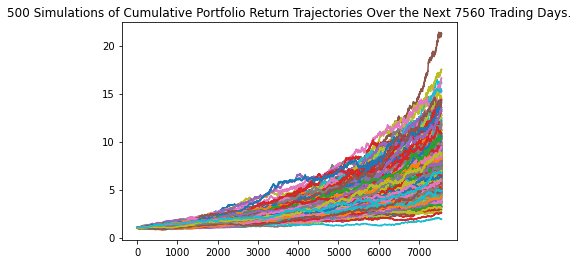

In [28]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

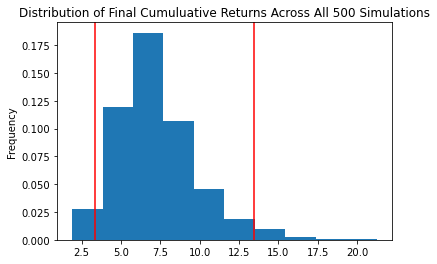

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean              7.264326
std               2.524293
min               1.906522
25%               5.550825
50%               6.886133
75%               8.393218
max              21.240570
95% CI Lower      3.330675
95% CI Upper     13.432361
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stats[8]*initial_investment,2)
ci_upper = round(sum_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66613.5 and $268647.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stats[8]*initial_investment2,2)
ci_upper = round(sum_stats[9]*initial_investment2,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $99920.25 and $402970.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")